Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 4th Semester                                           
Batch: I-3            
                                                                       Date: 11/2/2022       
Subject: ML
###Experiment-8

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math
import seaborn as sns

In [ ]:
df=pd.read_csv("data_logistic_1.csv")

In [ ]:
df.head()

,gmat,admitted
0,780,1
1,750,1
2,690,1
3,710,1
4,680,1


In [ ]:
df.shape

(40, 2)

In [ ]:
#building lin reg model
x=df['gmat']
y=df['admitted']

In [ ]:
model=LinearRegression()

In [ ]:
x=np.array(x)
x=x.reshape((-1,1))
model.fit(x,y)

LinearRegression()

In [ ]:
r_sq=model.score(x,y)
print(r_sq)

0.6489286548799287


In [ ]:
print("Intercept: ",model.intercept_)
b0=model.intercept_

Intercept:  -3.8124830116879598


In [ ]:
print("Slope: ",model.coef_)
b1=model.coef_

Slope:  [0.00663224]


In [ ]:
#Doing Logistic Regression Manually
yhat = b0 + (b1*x)

In [ ]:
#applying sigmoid func
sig=1/(1+np.exp(-yhat))

In [ ]:
sh=sig.shape
output=np.zeros((sh[0],1))

In [ ]:
for i in range(0,sh[0]):
  if sig[i]>0.5:
    output[i]=1
  else:
    output[i]=0  

In [ ]:
y=np.array(y)
y=y.reshape((1,sh[0]))
output=output.reshape((1,sh[0]))

print("Output",output,'\n')
print("Admitted",y)

Output [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
  0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]] 

Admitted [[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0
  1 0 0 1]]


In [ ]:
error=0
for i in range(0,sh[0]):
  if output[0][i] != y[0][i]:
    error=error+1

error    


15

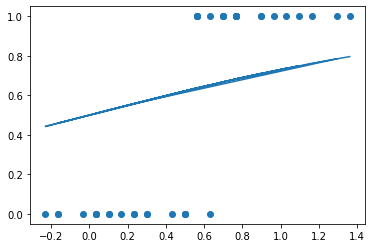

In [ ]:
plt.scatter(yhat,y)
plt.plot(yhat,sig)

In [ ]:
#Loading another dataset
df=pd.read_csv("data_logistic.csv")

In [ ]:
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [ ]:
#Using Logistic Regression Func
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
x=df[['gmat','gpa','work_experience']]
y=df['admitted']

In [ ]:
x.shape

(40, 3)

In [ ]:
y.shape

(40,)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0,shuffle=True)

In [ ]:
xtrain.shape

(28, 3)

In [ ]:
xtest.shape

(12, 3)

In [ ]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
accuracy = metrics.accuracy_score(ytest,y_pred)
accuracy

0.8333333333333334

In [ ]:
#to plot confusion mat
con_mat = pd.crosstab(ytest,y_pred,rownames=['Actual'],colnames=['Predicted'])

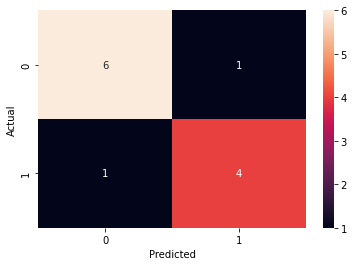

In [ ]:
sns.heatmap(con_mat,annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[6, 1],
       [1, 4]])

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(ytest,y_pred)

0.8

In [ ]:
recall_score(ytest,y_pred)

0.8

In [ ]:
from sklearn.metrics import f1_score
f1_score(ytest,y_pred)

0.8000000000000002

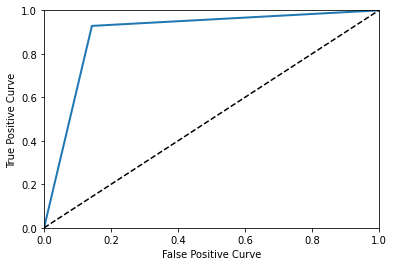

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(model,xtrain,ytrain,cv=3,method='predict')


from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(ytrain,y_scores)

def plot_roc(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Curve')
  plt.ylabel('True Positive Curve')
                         
plot_roc(fpr,tpr)     

#Conclusion:
1) Implemented linear and logistic regression on scores dataset.   
2) Logistic regression is useful to predict the class of the new datapoint as in, when the new data point gets added to data set it makes a more accurate prediction about which class the data point will lie in.   
3) Splitting the dataset into a ratio of 70:30 for train:test gives the most accurate model.       
4) Using more sklearn metrics like heatmap,ROC curve etc helps us to get a clear insight into more parameters like false positives, true negatives etc.

In [1]:
! jupyter nbconvert --to html I082_Shreyas_Dongre_ML_Prac8.ipynb

[NbConvertApp] Converting notebook I082_Shreyas_Dongre_ML_Prac8.ipynb to html
[NbConvertApp] Writing 347193 bytes to I082_Shreyas_Dongre_ML_Prac8.html
